In [96]:
#importing necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. ensemble import VotingClassifier

In [97]:
%matplotlib inline                     

In [98]:
df = pd.read_csv('Information.csv', encoding='ISO-8859–1') #reading the dataset

In [99]:
df #displaying the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [100]:
df_male=df[df["gender"]=='male']

In [101]:
df_male    #dataFrame containing males only.

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20037,815756103,True,golden,259,NaN,male,1.0000,yes,1.0,11/27/07 13:10,...,https://pbs.twimg.com/profile_images/301147383...,0,FFFFFF,@TrentWalton @oguzbilgic Spell it out in all-c...,NaN,9092,10/26/15 13:19,6.587400e+17,"Brooklyn, NY",Eastern Time (US & Canada)
20040,815756417,True,golden,253,NaN,male,0.8472,yes,1.0,8/16/13 14:48,...,https://pbs.twimg.com/profile_images/557215663...,0,0,Discovered it in England. It's how they eat fi...,NaN,3084,10/26/15 13:19,6.587400e+17,"Houston, Texas",Central Time (US & Canada)
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/11 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/15 13:19,6.587400e+17,Chertsey Bridge,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN


# Q1 Find the most used words by male and females

# i) Most used words used by male:

In [102]:
df_male.columns #columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [103]:
col_req=['gender','text']
df_male=df_male[col_req]

In [104]:
df_male

,gender,text
0,male,Robbie E Responds To Critics After Win Against...
1,male,ÛÏIt felt like they were my friends and I was...
2,male,i absolutely adore when louis starts the songs...
3,male,Hi @JordanSpieth - Looking at the url - do you...
7,male,Gala Bingo clubs bought for å£241m: The UK's l...
...,...,...
20037,male,@TrentWalton @oguzbilgic Spell it out in all-c...
20040,male,Discovered it in England. It's how they eat fi...
20043,male,"Game faggot and venison loin, crisp spelt and ..."
20046,male,Greg Hardy you a good player and all but don't...


In [105]:
import nltk    #importing nltk library

In [106]:
df_maleText=df_male[['text']]
df_maleText

,text
0,Robbie E Responds To Critics After Win Against...
1,ÛÏIt felt like they were my friends and I was...
2,i absolutely adore when louis starts the songs...
3,Hi @JordanSpieth - Looking at the url - do you...
7,Gala Bingo clubs bought for å£241m: The UK's l...
...,...
20037,@TrentWalton @oguzbilgic Spell it out in all-c...
20040,Discovered it in England. It's how they eat fi...
20043,"Game faggot and venison loin, crisp spelt and ..."
20046,Greg Hardy you a good player and all but don't...


In [107]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
for i in df_maleText['text']:
    print(i)                  #iterating over text by males.

Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
i absolutely adore when louis starts the songs it hits me hard but it feels good
Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
Gala Bingo clubs bought for å£241m: The UK's largest High Street bingo operator, Gala, is being taken over byÛ_ https://t.co/HzeeykJUd3
@coolyazzy94 Ditto - I'm still learning the favourites and retweet stuff - least it sucks less than Facebook haha :P
@CaribBros @JstSaleem I do but I don't understand how to get to the server to get it
YALL LMFAOO RIGHT WHEN THE CHORUS CAME ON, A TEAR ROLLED DOWN HIS FACE https://t.co/aYuQDPtvsE
James Bond premier night at the @Everymancinema in Oxted with @SidiEdey. Let's hope it lives up 

In [109]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Tokenization

In [110]:
tokenized_word=[]
for word in df_maleText['text']:
    lower_str=word.lower()
    tokenized_word.append(word_tokenize(lower_str))
tokenized_word

[['robbie',
  'e',
  'responds',
  'to',
  'critics',
  'after',
  'win',
  'against',
  'eddie',
  'edwards',
  'in',
  'the',
  '#',
  'worldtitleseries',
  'https',
  ':',
  '//t.co/nsybbmvjkz'],
 ['\x89ûïit',
  'felt',
  'like',
  'they',
  'were',
  'my',
  'friends',
  'and',
  'i',
  'was',
  'living',
  'the',
  'story',
  'with',
  'them\x89û\x9d',
  'https',
  ':',
  '//t.co/arnge0yhno',
  '#',
  'retired',
  '#',
  'ian1',
  'https',
  ':',
  '//t.co/cizcanpqfz'],
 ['i',
  'absolutely',
  'adore',
  'when',
  'louis',
  'starts',
  'the',
  'songs',
  'it',
  'hits',
  'me',
  'hard',
  'but',
  'it',
  'feels',
  'good'],
 ['hi',
  '@',
  'jordanspieth',
  '-',
  'looking',
  'at',
  'the',
  'url',
  '-',
  'do',
  'you',
  'use',
  '@',
  'ifttt',
  '?',
  '!',
  'do',
  "n't",
  'typically',
  'see',
  'an',
  'advanced',
  'user',
  'on',
  'the',
  '@',
  'pgatour',
  '!',
  'https',
  ':',
  '//t.co/h68ou5pe9l'],
 ['gala',
  'bingo',
  'clubs',
  'bought',
  'for',
  

In [111]:
nltk.download('stopwords')   #Importing Stopwords.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
stopwords_list=list(stopwords.words('english'))

In [113]:
stopwords_list.append('https')

# Removing StopWords

In [114]:
clean_text=[]
for i in tokenized_word:
    for j in i:
        if j not in stopwords_list:
            clean_text.append(j);
(clean_text)

['robbie',
 'e',
 'responds',
 'critics',
 'win',
 'eddie',
 'edwards',
 '#',
 'worldtitleseries',
 ':',
 '//t.co/nsybbmvjkz',
 '\x89ûïit',
 'felt',
 'like',
 'friends',
 'living',
 'story',
 'them\x89û\x9d',
 ':',
 '//t.co/arnge0yhno',
 '#',
 'retired',
 '#',
 'ian1',
 ':',
 '//t.co/cizcanpqfz',
 'absolutely',
 'adore',
 'louis',
 'starts',
 'songs',
 'hits',
 'hard',
 'feels',
 'good',
 'hi',
 '@',
 'jordanspieth',
 '-',
 'looking',
 'url',
 '-',
 'use',
 '@',
 'ifttt',
 '?',
 '!',
 "n't",
 'typically',
 'see',
 'advanced',
 'user',
 '@',
 'pgatour',
 '!',
 ':',
 '//t.co/h68ou5pe9l',
 'gala',
 'bingo',
 'clubs',
 'bought',
 'å£241m',
 ':',
 'uk',
 "'s",
 'largest',
 'high',
 'street',
 'bingo',
 'operator',
 ',',
 'gala',
 ',',
 'taken',
 'by\x89û_',
 ':',
 '//t.co/hzeeykjud3',
 '@',
 'coolyazzy94',
 'ditto',
 '-',
 "'m",
 'still',
 'learning',
 'favourites',
 'retweet',
 'stuff',
 '-',
 'least',
 'sucks',
 'less',
 'facebook',
 'haha',
 ':',
 'p',
 '@',
 'caribbros',
 '@',
 'jstsale

In [115]:
import re

# Removing Delimiters,punctuations

In [116]:
arr=[]
for words in clean_text:
    if  words.isalpha() :
        arr.append(re.sub(r'[^\w\s]',' ',words))
arr

['robbie',
 'e',
 'responds',
 'critics',
 'win',
 'eddie',
 'edwards',
 'worldtitleseries',
 'felt',
 'like',
 'friends',
 'living',
 'story',
 'retired',
 'absolutely',
 'adore',
 'louis',
 'starts',
 'songs',
 'hits',
 'hard',
 'feels',
 'good',
 'hi',
 'jordanspieth',
 'looking',
 'url',
 'use',
 'ifttt',
 'typically',
 'see',
 'advanced',
 'user',
 'pgatour',
 'gala',
 'bingo',
 'clubs',
 'bought',
 'uk',
 'largest',
 'high',
 'street',
 'bingo',
 'operator',
 'gala',
 'taken',
 'ditto',
 'still',
 'learning',
 'favourites',
 'retweet',
 'stuff',
 'least',
 'sucks',
 'less',
 'facebook',
 'haha',
 'p',
 'caribbros',
 'jstsaleem',
 'understand',
 'get',
 'server',
 'get',
 'yall',
 'lmfaoo',
 'right',
 'chorus',
 'came',
 'tear',
 'rolled',
 'face',
 'james',
 'bond',
 'premier',
 'night',
 'everymancinema',
 'oxted',
 'sidiedey',
 'let',
 'hope',
 'lives',
 'expectation',
 'spectre',
 'opposed',
 'pump',
 'like',
 'hi',
 'hope',
 'like',
 'jumps',
 'spread',
 'feet',
 'across',
 '

In [117]:
arr_set=set(arr)      #Counting Frequency of Words used.
Dict={}
for i in arr_set:
    Dict[i]=arr.count(i)
Dict

{'participate': 1,
 'michaelvdc': 1,
 'bull': 4,
 'everytime': 5,
 'criticisms': 1,
 'warmonger': 1,
 'favourite': 1,
 'bit': 30,
 'transanimation': 1,
 'buhari': 1,
 'heartbreaking': 1,
 'living': 13,
 'androidgames': 2,
 'registered': 1,
 'bun': 7,
 'managed': 6,
 'grateful': 1,
 'ljurfavsinger': 1,
 'key': 2,
 'angles': 2,
 'bt': 1,
 'serves': 1,
 'fitting': 2,
 'stone': 1,
 'generation': 3,
 'seems': 14,
 'sicario': 1,
 'yahooscreenuk': 1,
 'descent': 1,
 'askkarabo': 1,
 'peace': 4,
 'bomber': 1,
 'realjameswoods': 1,
 'dice': 1,
 'easiest': 1,
 'derrick': 1,
 'danielvankirk': 1,
 'presence': 1,
 'gap': 1,
 'collab': 4,
 'theleapz': 1,
 'blowitup': 1,
 'bouquet': 1,
 'lesson': 2,
 'prov': 1,
 'debilzan': 1,
 'noles': 1,
 'adversity': 2,
 'economicfreedommarch': 1,
 'oink': 1,
 'stink': 1,
 'celticfc': 2,
 'invited': 4,
 'mechanically': 1,
 'moon': 4,
 'goodell': 2,
 'striker': 1,
 'eminem': 1,
 'posts': 4,
 'raidernation': 1,
 'catfished': 1,
 'sidestep': 1,
 'squad': 4,
 'treatme

In [118]:
sorted_dict= sorted(Dict.items(), key=lambda x: x[1], reverse=True) #Sorting according to ocurrence

In [119]:
sorted_dict

[('like', 350),
 ('get', 345),
 ('one', 265),
 ('time', 228),
 ('new', 217),
 ('love', 213),
 ('go', 204),
 ('people', 195),
 ('got', 189),
 ('good', 183),
 ('day', 182),
 ('know', 182),
 ('would', 166),
 ('see', 166),
 ('back', 156),
 ('think', 156),
 ('best', 153),
 ('amp', 152),
 ('make', 148),
 ('still', 145),
 ('last', 143),
 ('need', 136),
 ('want', 133),
 ('way', 117),
 ('really', 117),
 ('great', 116),
 ('game', 113),
 ('lol', 113),
 ('via', 108),
 ('could', 108),
 ('going', 108),
 ('year', 107),
 ('na', 107),
 ('well', 105),
 ('much', 102),
 ('world', 102),
 ('ca', 102),
 ('today', 101),
 ('first', 98),
 ('always', 97),
 ('life', 97),
 ('man', 97),
 ('come', 97),
 ('u', 95),
 ('let', 94),
 ('even', 94),
 ('shit', 92),
 ('say', 90),
 ('never', 87),
 ('im', 87),
 ('fuck', 87),
 ('work', 85),
 ('look', 84),
 ('right', 83),
 ('ever', 82),
 ('thing', 81),
 ('us', 81),
 ('next', 80),
 ('keep', 76),
 ('week', 76),
 ('take', 76),
 ('gon', 76),
 ('hope', 75),
 ('thanks', 74),
 ('made',

In [120]:
res = sorted_dict[0]

In [121]:
print("The most used word males used is:",res)

The most used word males used is: ('like', 350)


# ii) Most used words by female:

In [122]:
df_female=df[df['gender']=='female']  #Dataframe for Females

In [123]:
df_female


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam
12,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0,8/10/12 5:05,...,https://pbs.twimg.com/profile_images/651227967...,0,FFFFFF,Just put my ass on the line for you and this i...,NaN,13585,10/26/15 12:40,6.587300e+17,NaN,Atlantic Time (Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20039,815756332,True,golden,227,NaN,female,1.0000,yes,1.0,2/21/12 18:36,...,https://pbs.twimg.com/profile_images/631301797...,0,C0DEED,Especially when all you do is the best you can...,NaN,2034,10/26/15 12:39,6.587300e+17,NaN,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/14 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.587400e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [124]:
fecol_req=['gender','text']
df_female=df_female[fecol_req]
df_femaleText=df_female[['text']]
df_femaleText

,text
4,Watching Neighbours on Sky+ catching up with t...
5,"Ive seen people on the train with lamps, chair..."
8,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,@Evielady just how lovely is the tree this yea...
12,Just put my ass on the line for you and this i...
...,...
20039,Especially when all you do is the best you can...
20044,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...
20045,"@lookupondeath ...Fine, and I'll drink tea too..."
20048,@bitemyapp i had noticed your tendency to pee ...


In [125]:
tokenized_fword=[]
for word in df_femaleText['text']:
    lower_str=word.lower()
    tokenized_fword.append(word_tokenize(lower_str))


In [126]:
clean_ftext=[]
for i in tokenized_fword:
    for j in i:
        if j not in stopwords_list:
            clean_ftext.append(j);
clean_ftext

['watching',
 'neighbours',
 'sky+',
 'catching',
 'neighbs',
 '!',
 '!',
 'xxx',
 '_ù÷ä_ù÷ä_ù÷ä_ùôî_ù\x8fè_ùô\x8d_ù\x8fè',
 'xxx',
 'ive',
 'seen',
 'people',
 'train',
 'lamps',
 ',',
 'chairs',
 ',',
 'tvs',
 'etc',
 ':',
 '//t.co/w6zf4pvm4i',
 '@',
 '_aphmau_',
 'pic',
 'defines',
 'mcd',
 'fangirls/fanboys',
 'mcd',
 'shippers',
 'xd',
 '@',
 'evielady',
 'lovely',
 'tree',
 'year',
 '!',
 'never',
 'seen',
 'gorgeous',
 '#',
 'autumn',
 '#',
 'colour',
 'put',
 'ass',
 'line',
 'repay',
 '.',
 'even',
 'need',
 'sound',
 'effects',
 'diviners',
 'tonight',
 ':',
 '//t.co/erogwtftyo',
 "'s",
 'glow',
 'satisfaction',
 'glow',
 ':',
 '//t.co/7rdymcvpkx',
 '@',
 'giannaaa28',
 'lmao',
 '_ù÷â_ù÷â',
 'dude',
 "'m",
 'hella',
 'scared',
 'next',
 'episode',
 'bc',
 'ending',
 'yesterday',
 "'s",
 '@',
 'craftyear2015',
 '@',
 'isabelpascual',
 'thank',
 'retweets',
 'girls',
 'went',
 'sleep',
 'guys',
 'sat',
 'floor',
 'watched',
 'us_ù÷â_ù÷â',
 '@',
 'chrisaofficial',
 "'m",
 'right

In [127]:
fearr=[]
for words in clean_ftext:
    if  words.isalpha() :
        fearr.append(re.sub(r'[^\w\s]',' ',words))
fearr

['watching',
 'neighbours',
 'catching',
 'neighbs',
 'xxx',
 'xxx',
 'ive',
 'seen',
 'people',
 'train',
 'lamps',
 'chairs',
 'tvs',
 'etc',
 'pic',
 'defines',
 'mcd',
 'mcd',
 'shippers',
 'xd',
 'evielady',
 'lovely',
 'tree',
 'year',
 'never',
 'seen',
 'gorgeous',
 'autumn',
 'colour',
 'put',
 'ass',
 'line',
 'repay',
 'even',
 'need',
 'sound',
 'effects',
 'diviners',
 'tonight',
 'glow',
 'satisfaction',
 'glow',
 'lmao',
 'dude',
 'hella',
 'scared',
 'next',
 'episode',
 'bc',
 'ending',
 'yesterday',
 'isabelpascual',
 'thank',
 'retweets',
 'girls',
 'went',
 'sleep',
 'guys',
 'sat',
 'floor',
 'watched',
 'chrisaofficial',
 'right',
 'sydniejr',
 'except',
 'hallmark',
 'movies',
 'start',
 'wo',
 'get',
 'anything',
 'done',
 'leave',
 'group',
 'chat',
 'mins',
 'miss',
 'made',
 'shit',
 'week',
 'brandon',
 'birthday',
 'thing',
 'birthday',
 'week',
 'u',
 'weirdo',
 'november',
 'birthday',
 'month',
 'bow',
 'boy',
 'el',
 'wit',
 'daughters',
 'went',
 'wron

In [128]:
arr_fset=set(fearr)
fDict={}
for i in arr_fset:
    fDict[i]=fearr.count(i)
fDict

{'freebies': 1,
 'bull': 1,
 'floral': 1,
 'everytime': 4,
 'thunder': 1,
 'favourite': 6,
 'bit': 16,
 'toffee': 1,
 'happyhome': 1,
 'heartbreaking': 2,
 'living': 20,
 'androidgames': 1,
 'chime': 1,
 'managed': 4,
 'bun': 2,
 'grateful': 7,
 'key': 9,
 'dissappoint': 1,
 'angles': 2,
 'bt': 1,
 'fitting': 1,
 'judgemental': 1,
 'stone': 2,
 'generation': 6,
 'seems': 7,
 'teggelove': 1,
 'peace': 8,
 'laurenfell': 1,
 'easiest': 1,
 'mojo': 1,
 'prager': 1,
 'dice': 1,
 'presence': 1,
 'derrick': 1,
 'greggy': 1,
 'nostalgic': 1,
 'gap': 2,
 'collab': 1,
 'epcot': 1,
 'neat': 1,
 'twitition': 2,
 'nervous': 2,
 'wadewantstacos': 1,
 'lesson': 4,
 'candypo': 1,
 'blissfulnate': 1,
 'dnce': 1,
 'invited': 2,
 'moon': 10,
 'prettiest': 3,
 'striker': 1,
 'eminem': 2,
 'posts': 5,
 'allergic': 1,
 'expo': 1,
 'tesla': 1,
 'squad': 8,
 'fava': 1,
 'ignorance': 2,
 'critique': 1,
 'khan': 1,
 'expanding': 1,
 'encryption': 1,
 'ero': 1,
 'pw': 1,
 'jasiabsjabdh': 1,
 'artbrut': 1,
 'seen

In [129]:
sorted_fdict= sorted(fDict.items(), key=lambda x: x[1], reverse=True)
sorted_fdict

[('like', 449),
 ('get', 353),
 ('one', 328),
 ('love', 321),
 ('day', 291),
 ('go', 276),
 ('people', 249),
 ('time', 241),
 ('got', 210),
 ('know', 210),
 ('new', 206),
 ('amp', 203),
 ('want', 198),
 ('best', 189),
 ('last', 178),
 ('back', 171),
 ('good', 168),
 ('see', 160),
 ('ca', 160),
 ('make', 159),
 ('still', 159),
 ('need', 156),
 ('na', 156),
 ('would', 143),
 ('today', 142),
 ('u', 141),
 ('life', 139),
 ('makes', 136),
 ('think', 134),
 ('going', 134),
 ('really', 132),
 ('even', 131),
 ('right', 129),
 ('lol', 127),
 ('work', 121),
 ('much', 119),
 ('always', 118),
 ('never', 116),
 ('ever', 113),
 ('im', 109),
 ('thank', 108),
 ('way', 107),
 ('could', 106),
 ('take', 105),
 ('world', 105),
 ('girl', 105),
 ('shit', 103),
 ('thing', 103),
 ('happy', 103),
 ('let', 102),
 ('home', 101),
 ('onedirection', 100),
 ('say', 100),
 ('come', 100),
 ('great', 97),
 ('first', 96),
 ('via', 95),
 ('year', 95),
 ('please', 95),
 ('pushawardslizquens', 93),
 ('follow', 93),
 ('look

In [130]:
resf=sorted_fdict[0]
print("The most used words females used is: ",resf)

The most used words females used is:  ('like', 449)


# Q2 how many observations of gender are female?

In [131]:
female_count = len(df[df['gender'] == 'female']) #Counting Numbers Of Females

In [132]:
print("The total number of females is: ",female_count) 

The total number of females is:  6700


In [133]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [134]:
pd.value_counts(df.gender)

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [135]:
df_new=df #Making New DataFrame

In [136]:
df_new=df[df.gender!='brand'] #Removing the brand values from column gender

In [137]:
pd.value_counts(df_new.gender)

female     6700
male       6194
unknown    1117
Name: gender, dtype: int64

In [138]:
df_new=df_new[df_new.gender!='unknown'] #Removing the unknown values from column gender

In [139]:
pd.value_counts(df_new.gender)

female    6700
male      6194
Name: gender, dtype: int64

In [140]:
df_new

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [142]:
df.describe() # summarize the data

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


# Feature Selction Process

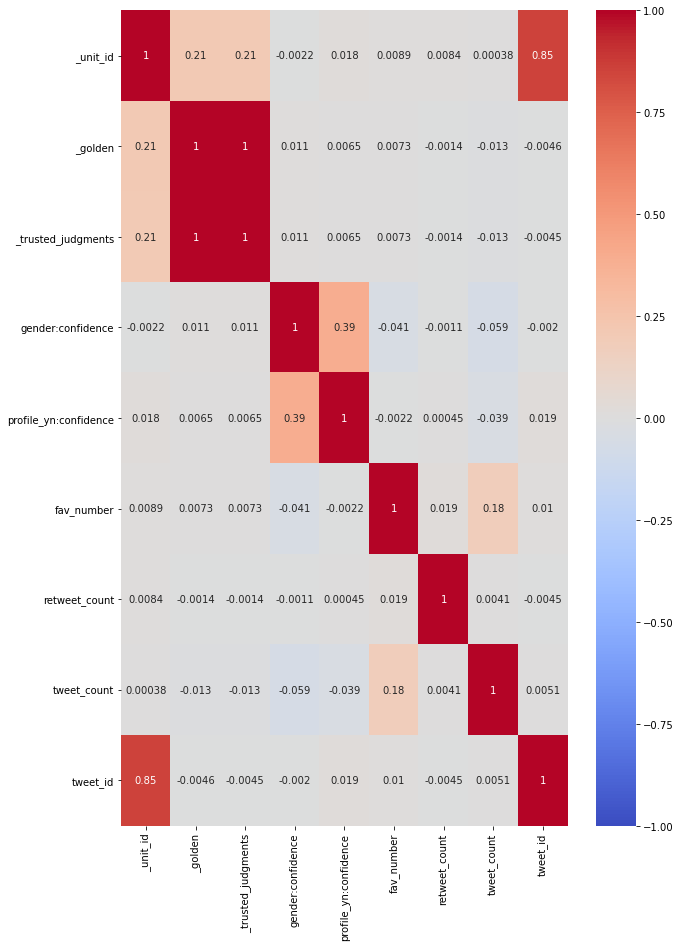

In [143]:
import seaborn as sns
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,15))
#plot heat map
g=sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [144]:
df_new=df_new[['gender','fav_number','tweet_count']]  #Adding Usefull Coloumns

In [145]:
df_new.isna().sum() #Checking For null values

gender         97
fav_number      0
tweet_count     0
dtype: int64

In [146]:
df_new.shape #gives number of rows and columns

(12991, 3)

In [147]:
df_new.drop_duplicates(inplace=True) #Removing duplicate rows


<ipython-input-147-3a1b9c3b7b78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop_duplicates(inplace=True) #Removing duplicate rows


In [148]:
df_new=df_new.dropna() #droping null vlaues

In [149]:
df_new.isna().sum()

gender         0
fav_number     0
tweet_count    0
dtype: int64

# Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df_new['gender']=Le.fit_transform(df_new['gender']) 

In [151]:
df_new

,gender,fav_number,tweet_count
0,1,0,110964
1,1,68,7471
2,1,7696,5617
3,1,202,1693
4,0,37318,31462
...,...,...,...
19995,1,33834,29190
19996,1,2462,11117
19997,0,1855,5640
19998,0,2160,2041


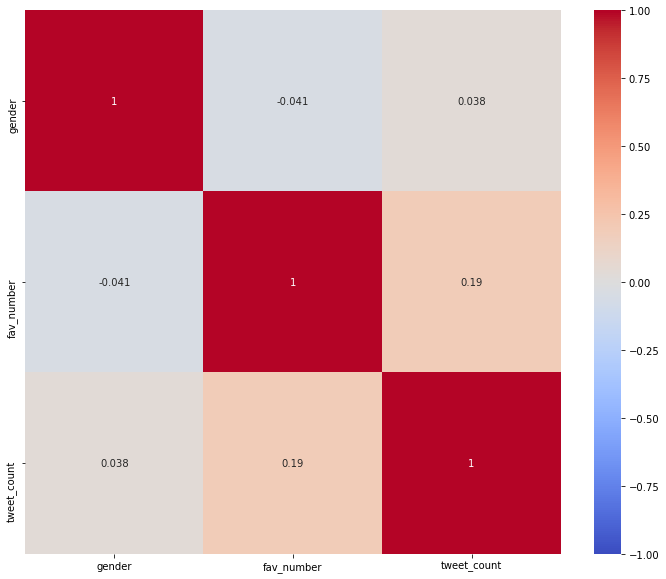

In [152]:
import seaborn as sns       
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = 12,10
#plot heat map
g=sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

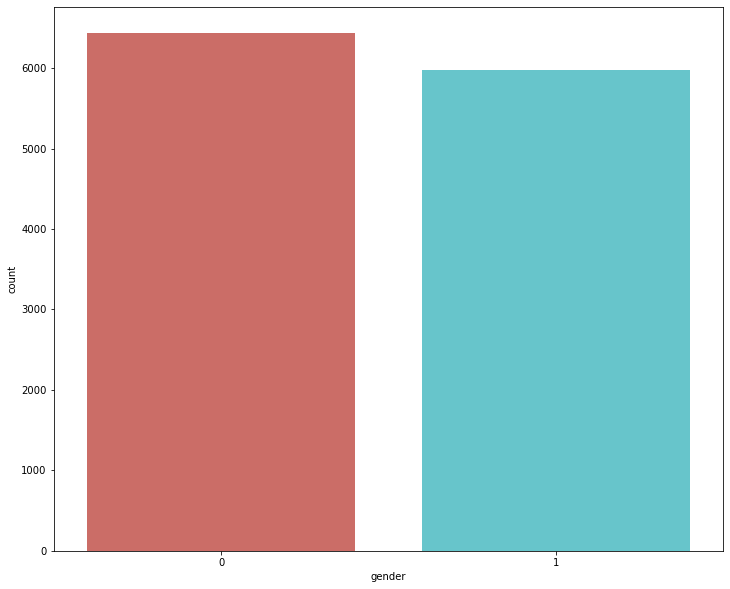

In [153]:
sns.countplot(x='gender',data=df_new,palette='hls')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E9A1C4C0>,
      dtype=object)

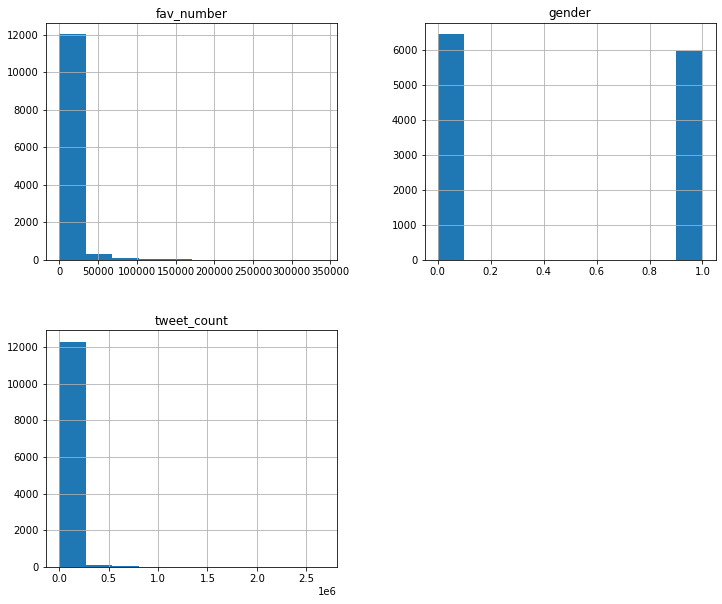

In [154]:
df_new.hist()

In [155]:
df_new.columns

Index(['gender', 'fav_number', 'tweet_count'], dtype='object')

# Q3. Calculating and comparing the accuracy using three different algorithms

# Accuracy for Logistic Regression Algorithm

In [156]:
X=df_new[['fav_number', 'tweet_count']] # Performing a simple feature selection
Y=df_new[['gender']]

In [157]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [158]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [159]:
LogReg = LogisticRegression()
# training Logistic Regression model on training data
LogReg.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', LogReg.coef_)
print ('Intercept: ',LogReg.intercept_)


Coefficients:  [[-0.08787611  0.10757741]]
Intercept:  [-0.07797616]


C:\Users\Suma\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [160]:
y_pred = LogReg.predict(X_test)
y_pred


array([1, 0, 0, ..., 0, 0, 0])

In [161]:
score = LogReg.score(X_test, Y_test)
print(score)

0.5169218372280419


In [162]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,LogReg.predict(X_test))
print('Accuracy of Logistic Regression is: ',ac)

Accuracy of Logistic Regression is:  0.5169218372280419


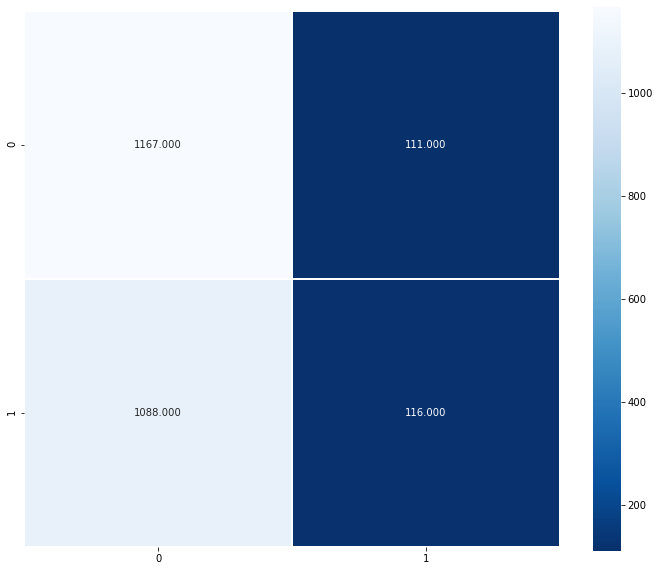

In [163]:
cm = metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [164]:
import math
math.sqrt(len(Y_test))

49.8196748283246

# Accuracy for K-Nearest Neighbors Algorithm

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [166]:
classifier=KNeighborsClassifier(n_neighbors=39,p=2,metric='euclidean')

In [167]:
classifier.fit(X_train,Y_train)

<ipython-input-167-69854fe6a458>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=39)

In [168]:
y_knnpredict=classifier.predict(X_test)

In [169]:
print(f1_score(Y_test,y_knnpredict))

0.5158694680375503


In [170]:
As=accuracy_score(Y_test,y_knnpredict)
print('Accuracy of K-Nearest Neighbors is: ',As)

Accuracy of K-Nearest Neighbors is:  0.5636583400483481


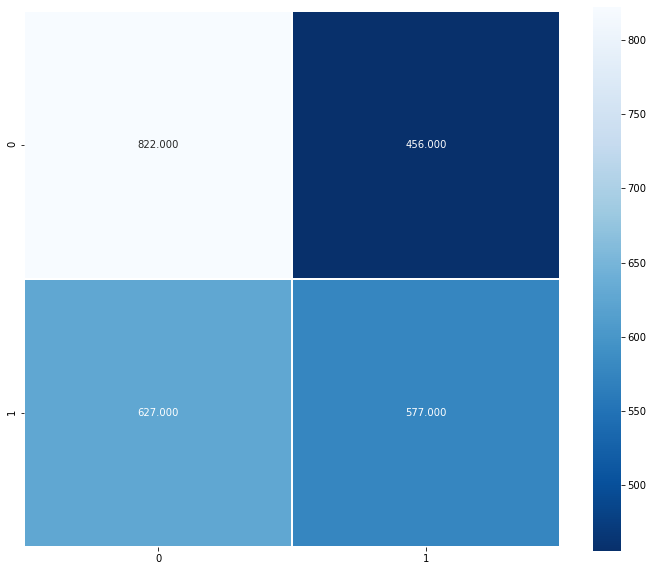

In [171]:
cm1 = metrics.confusion_matrix(Y_test, y_knnpredict)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

# Accuracy for SVM algorithm

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
from sklearn.svm import SVC

In [174]:
sv=SVC()

In [175]:
sv.fit(X_train,Y_train)

C:\Users\Suma\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [176]:
y_pred=sv.predict(X_test)

In [177]:
print(f1_score(Y_test,y_pred))

0.5844645550527903


In [178]:
AccS = accuracy_score(Y_test,sv.predict(X_test))
print('Accuracy of SVM algorithm is: ',AccS)

Accuracy of SVM algorithm is:  0.5560032232070911


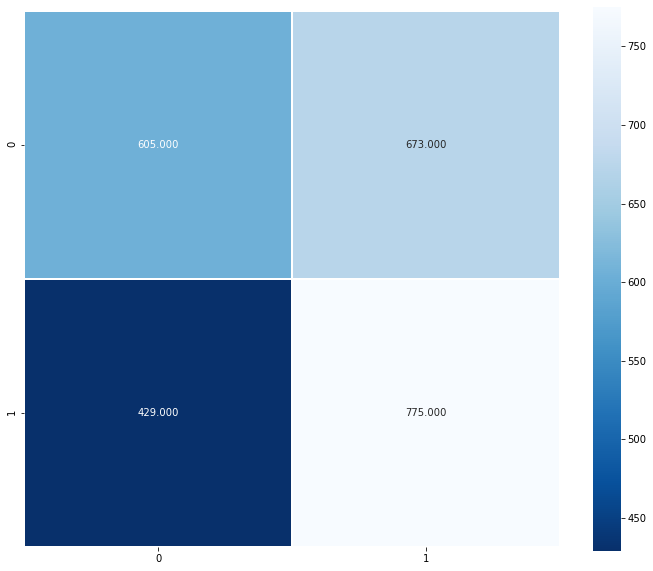

In [179]:
cm1 = metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [180]:
print('Accuracy of Logistic Regression is: ',ac)
print('Accuracy of K-Nearest Neighbors is: ',As)
print('Accuracy of SVM algorithm is: ',AccS)
def high_acc():
    a=max(ac,max(As,AccS))
    if(a==ac):
        return "Logistic Regression"
    elif a==As:
        return "K-Nearest Neighbours"
    else:
        return "Support Vector Machine"
print("Therefore, the algorithm with the best accuracy is :",high_acc())

Accuracy of Logistic Regression is:  0.5169218372280419
Accuracy of K-Nearest Neighbors is:  0.5636583400483481
Accuracy of SVM algorithm is:  0.5560032232070911
Therefore, the algorithm with the best accuracy is : K-Nearest Neighbours


In [181]:
print(sv.predict([[13097,8967]]))

[1]


# Ensemble Modelling

In [182]:
lr = LogisticRegression()
dt =KNeighborsClassifier()
svm = SVC()
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')
vot=evc.fit(X_train,Y_train)



C:\Users\Suma\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [183]:
y_ecv=vot.predict(X_test)
y_ecv

array([1, 0, 0, ..., 0, 0, 0])

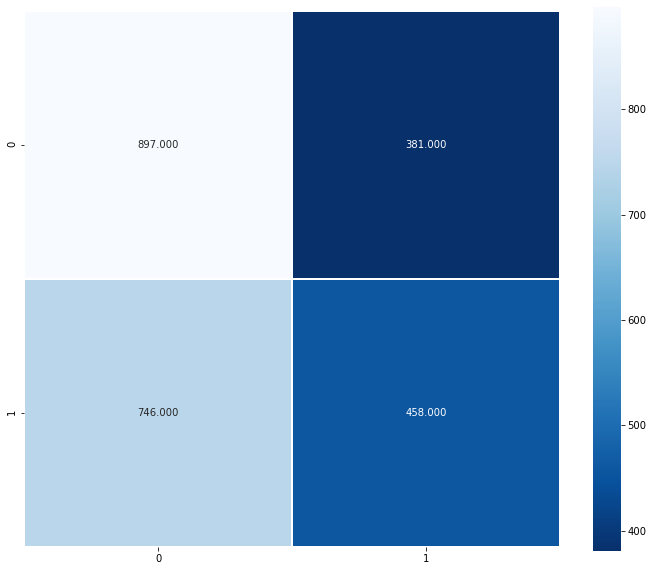

In [184]:
cm1 = metrics.confusion_matrix(Y_test, y_ecv)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [185]:
evc.score(X_test,Y_test)

0.5459307010475423

In [186]:
def pred(x,y):
    male=0
    female=0
    if LogReg.predict([[x,y]])==[1]:
        male=male+1
    else:
        female=female+1
    if classifier.predict([[x,y]])==[1]:
        male=male+1
    else:
        female=female+1
    if sv.predict([[x,y]])==[1]:
        male=male+1
    else:
        female=female+1
    if male>female:
        print('male')
    else:
        print("female")

In [187]:
p,q=[int(x) for x in input("Enter the two values: ").split(',')]
pred(p,q)

Enter the two values: 3,5657
male
